# Necessary imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import cv2 as cv

# Connect to the drive and unzip dataset

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
!unzip  "/content/drive/MyDrive/archive.zip" 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train images 13440x32x32/train/id_5500_label_16.png  
  inflating: train images 13440x32x32/train/id_5501_label_16.png  
  inflating: train images 13440x32x32/train/id_5502_label_16.png  
  inflating: train images 13440x32x32/train/id_5503_label_16.png  
  inflating: train images 13440x32x32/train/id_5504_label_16.png  
  inflating: train images 13440x32x32/train/id_5505_label_17.png  
  inflating: train images 13440x32x32/train/id_5506_label_17.png  
  inflating: train images 13440x32x32/train/id_5507_label_17.png  
  inflating: train images 13440x32x32/train/id_5508_label_17.png  
  inflating: train images 13440x32x32/train/id_5509_label_17.png  
  inflating: train images 13440x32x32/train/id_550_label_13.png  
  inflating: train images 13440x32x32/train/id_5510_label_17.png  
  inflating: train images 13440x32x32/train/id_5511_label_17.png  
  inflating: train images 13440x32x32/train/id_5512_

#Load dataset

In [ ]:
train_data = pd.read_csv('/content/arabic handwritten characters dataset csv/csvTrainImages 13440x1024.csv', header = None).values
Y_train = pd.read_csv('/content/arabic handwritten characters dataset csv/csvTrainLabel 13440x1.csv', header = None)
test_data = pd.read_csv('/content/arabic handwritten characters dataset csv/csvTestImages 3360x1024.csv', header = None).values
Y_test = pd.read_csv('/content/arabic handwritten characters dataset csv/csvTestLabel 3360x1.csv', header = None)

Y_train = Y_train.squeeze()
Y_test = Y_test.squeeze()

In [ ]:
characters = ["ا","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"]
characters_dict = dict(zip(np.arange(1,len(characters)+1), characters))

#Data preprocessing

In [ ]:
Y_train = Y_train.map(characters_dict).values
Y_test = Y_test.map(characters_dict).values

X_train = (train_data).reshape(-1,32,32,1)
X_test = (test_data).reshape(-1,32,32,1)

def binarize(image):
    """This function binarizes  an image using the otsu algorithm
    and returns the original image and the binarized image"""
    image = image.astype(np.uint8)
    # Can we make the binarization better? --> for later
    # the 0 transforms autmatically the picture to grayscale

    ret, thresh = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    return thresh

# Binarize the training images
X_train_binary = []
for img in X_train:
    img_binary = binarize(img[:,:,0])  # take only one channel and convert to binary
    img_binary = np.expand_dims(img_binary, axis=-1)  # add channel dimension back
    X_train_binary.append(img_binary)
X_train = np.array(X_train_binary)

# Binarize the test images
X_test_binary = []
for img in X_test:
    img_binary = binarize(img[:,:,0])  # take only one channel and convert to binary
    img_binary = np.expand_dims(img_binary, axis=-1)  # add channel dimension back
    X_test_binary.append(img_binary)
X_test = np.array(X_test_binary)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train)
X_test,Y_test = shuffle(X_test,Y_test)


#Data visualization

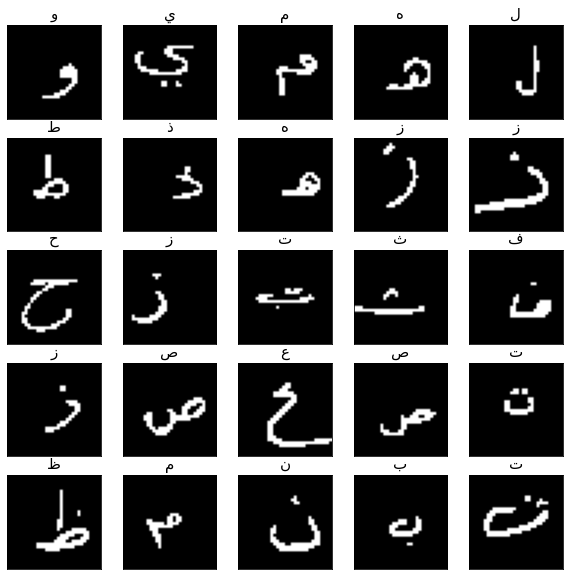

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(32,32).T,"gray")
    plt.title(Y_train[i][0],fontsize = 15)
plt.show()

# Encoding categorical and defining callbacks

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib 
lb = LabelEncoder()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.fit_transform(Y_test)
joblib.dump(lb,'label_encoder.joblib')

print(lb.classes_)

['ا' 'ب' 'ت' 'ث' 'ج' 'ح' 'خ' 'د' 'ذ' 'ر' 'ز' 'س' 'ش' 'ص' 'ض' 'ط' 'ظ' 'ع'
 'غ' 'ف' 'ق' 'ك' 'ل' 'م' 'ن' 'ه' 'و' 'ي']


#First CNN model

In [ ]:
file_path = 'content/CNN_1.h5'
checkpoint_1 = ModelCheckpoint(file_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode ='min')

In [ ]:

model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])






Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 54.2 MB/s eta 0:00:00


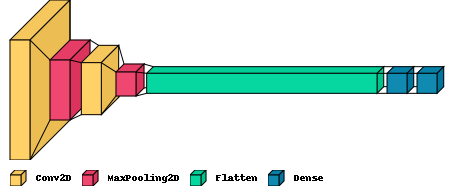

In [ ]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True)

In [ ]:
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.fit(X_train, 
          Y_train,
          epochs=30,
          validation_data=(X_test,Y_test),
          callbacks = [checkpoint_1])

Epoch 1/30
420/420 [==============================] - ETA: 0s - loss: 2.2423 - accuracy: 0.4254
Epoch 1: val_loss improved from inf to 0.93148, saving model to content/CNN_1.h5
420/420 [==============================] - 13s 4ms/step - loss: 2.2423 - accuracy: 0.4254 - val_loss: 0.9315 - val_accuracy: 0.6923
Epoch 2/30
418/420 [============================>.] - ETA: 0s - loss: 0.6631 - accuracy: 0.7833
Epoch 2: val_loss improved from 0.93148 to 0.60516, saving model to content/CNN_1.h5
420/420 [==============================] - 2s 4ms/step - loss: 0.6618 - accuracy: 0.7836 - val_loss: 0.6052 - val_accuracy: 0.8155
Epoch 3/30
420/420 [==============================] - ETA: 0s - loss: 0.3937 - accuracy: 0.8679
Epoch 3: val_loss improved from 0.60516 to 0.51980, saving model to content/CNN_1.h5
420/420 [==============================] - 2s 4ms/step - loss: 0.3937 - accuracy: 0.8679 - val_loss: 0.5198 - val_accuracy: 0.8399
Epoch 4/30
420/420 [==============================] - ETA: 0s - los

<Axes: >

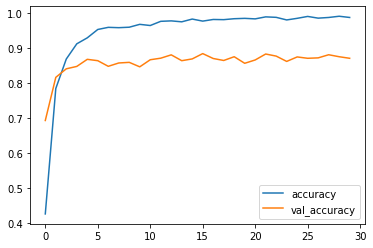

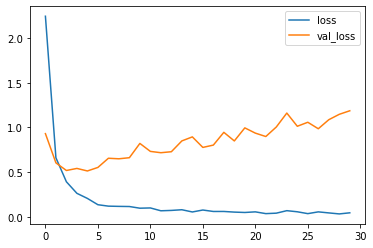

In [ ]:
# val precision 88.33% loss= 0.514
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()


#Second CNN model

In [ ]:
file_path = 'content/CNN_2.h5'
checkpoint_2 = ModelCheckpoint(file_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode ='min')

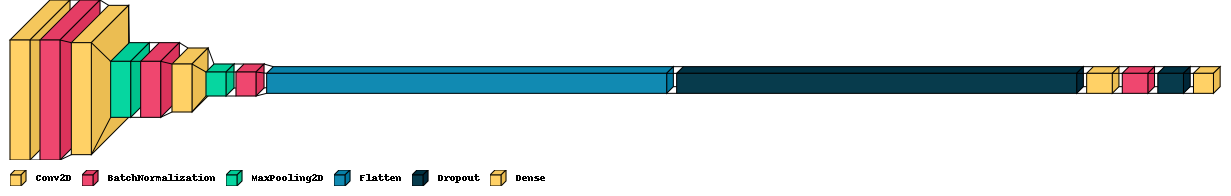

In [ ]:
#--> 95

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(28, activation='softmax')
])

visualkeras.layered_view(model_2, legend=True)

In [ ]:
model_2.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
model_2.fit(X_train, 
          Y_train,
          epochs=30,
          validation_data=(X_test,Y_test),
          callbacks = [checkpoint_2])

Epoch 1/30
414/420 [============================>.] - ETA: 0s - loss: 1.6300 - accuracy: 0.5336
Epoch 1: val_loss improved from inf to 0.54731, saving model to content/CNN_2.h5
420/420 [==============================] - 5s 6ms/step - loss: 1.6211 - accuracy: 0.5356 - val_loss: 0.5473 - val_accuracy: 0.8333
Epoch 2/30
414/420 [============================>.] - ETA: 0s - loss: 0.6729 - accuracy: 0.7868
Epoch 2: val_loss improved from 0.54731 to 0.41291, saving model to content/CNN_2.h5
420/420 [==============================] - 2s 5ms/step - loss: 0.6707 - accuracy: 0.7872 - val_loss: 0.4129 - val_accuracy: 0.8690
Epoch 3/30
414/420 [============================>.] - ETA: 0s - loss: 0.4665 - accuracy: 0.8524
Epoch 3: val_loss improved from 0.41291 to 0.30006, saving model to content/CNN_2.h5
420/420 [==============================] - 2s 5ms/step - loss: 0.4638 - accuracy: 0.8531 - val_loss: 0.3001 - val_accuracy: 0.9155
Epoch 4/30
415/420 [============================>.] - ETA: 0s - loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

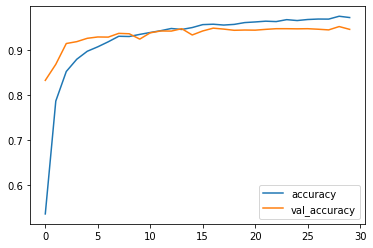

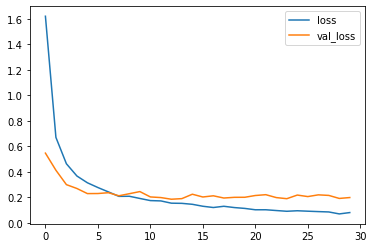

In [ ]:
# best precision : 94.73%, loss 0.1904
losses = pd.DataFrame(model_2.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()



#Third CNN model

In [ ]:
file_path = 'content/CNN_3.h5'
checkpoint_3 = ModelCheckpoint(file_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode ='min')

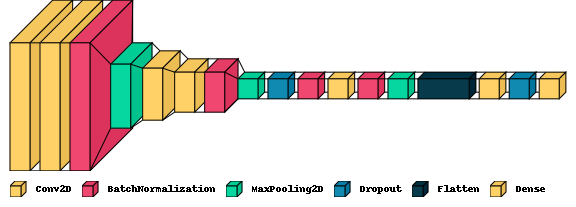

In [ ]:
model_3 = Sequential() 

model_3.add(Conv2D(64, kernel_size= (4,4), padding = 'same', input_shape = (32,32,1), activation= 'relu')) 

model_3.add(Conv2D(64, kernel_size= (4,4), padding = 'same', input_shape = (32,32,1), activation= 'relu')) 
model_3.add(BatchNormalization()) 
model_3.add(MaxPooling2D(pool_size=(2,2))) 

model_3.add(Conv2D(128, kernel_size= (4,4), activation= 'relu'))

model_3.add(Conv2D(128, kernel_size= (4,4), activation= 'relu'))
model_3.add(BatchNormalization()) 
model_3.add(MaxPooling2D(pool_size=(2,2))) 
model_3.add(Dropout(0.25)) 
model_3.add(BatchNormalization()) 

model_3.add(Conv2D(128, kernel_size= (4,4), activation= 'relu'))
model_3.add(BatchNormalization()) 
model_3.add(MaxPooling2D(pool_size=(1,1))) 

model_3.add(Flatten()) 
model_3.add(Dense(128, activation='relu')) 
model_3.add(Dropout(0.25))
model_3.add(Dense(28, activation='softmax'))

visualkeras.layered_view(model_3, legend=True)

In [ ]:
model_3.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1088      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 128)       131200    
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 128)      

In [ ]:
model_3.fit(X_train, 
          Y_train,
          epochs=30,
          validation_data=(X_test,Y_test),
          callbacks = [checkpoint_3])

Epoch 1/30
416/420 [============================>.] - ETA: 0s - loss: 1.3373 - accuracy: 0.5865
Epoch 1: val_loss improved from inf to 0.83997, saving model to content/CNN_3.h5
420/420 [==============================] - 7s 7ms/step - loss: 1.3316 - accuracy: 0.5882 - val_loss: 0.8400 - val_accuracy: 0.7369
Epoch 2/30
419/420 [============================>.] - ETA: 0s - loss: 0.4827 - accuracy: 0.8451
Epoch 2: val_loss improved from 0.83997 to 0.53574, saving model to content/CNN_3.h5
420/420 [==============================] - 3s 7ms/step - loss: 0.4829 - accuracy: 0.8450 - val_loss: 0.5357 - val_accuracy: 0.8351
Epoch 3/30
417/420 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.8925
Epoch 3: val_loss improved from 0.53574 to 0.35795, saving model to content/CNN_3.h5
420/420 [==============================] - 3s 7ms/step - loss: 0.3362 - accuracy: 0.8922 - val_loss: 0.3580 - val_accuracy: 0.8881
Epoch 4/30
417/420 [============================>.] - ETA: 0s - loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

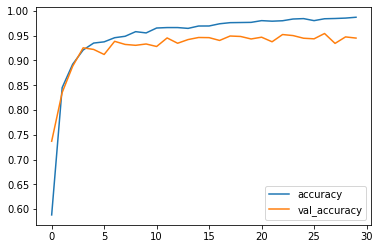

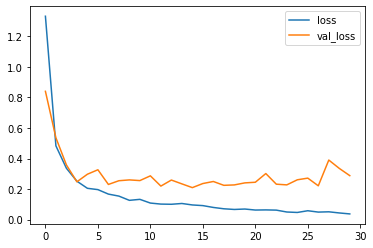

In [ ]:
# precision: 95.6% loss 0.21774
losses = pd.DataFrame(model_3.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()



# Classifying our real characters


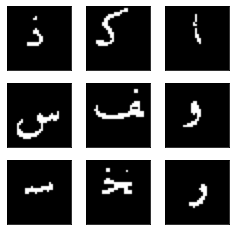

1/1 [==============================] - 0s 117ms/step
[ 8  0  0 11 19 26  2  6 26]
['ذ' 'ا' 'ا' 'س' 'ف' 'و' 'ت' 'خ' 'و']


In [ ]:
from PIL.ImageFont import load
import cv2 as cv 
from keras.models import load_model

model = load_model('/content/content/CNN_1.h5')
lb = joblib.load("/content/label_encoder.joblib")

def pre_process(char_image_path):
    
    img = cv.imread(char_image_path, 0)
    img=binarize(img)
    
    img = cv.resize(img, (32,32))
    img = np.expand_dims(img, axis=-1)
    img = img.reshape(32,32).T

    return img
  
def pre_process_2(char_image_path):

    img = cv.imread(char_image_path, 0)
    img=binarize(img)
    output_shape = (32, 32)
    # Calculate the padding required on each side
    pad_height = output_shape[0] - img.shape[0]
    pad_width = output_shape[1] - img.shape[1]

    # Calculate the amount of padding required on each side
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left

    # Pad the image with zeros
    padded_img = np.pad(img, ((pad_top, pad_bottom), (pad_left, pad_right)), 'constant', constant_values=0)
    padded_img = padded_img.reshape(32,32).T
    return padded_img

#The characters need to be uploaded!

images = np.array(list(map(pre_process_2, ["/content/"+str(i)+".jpg" for i in range(9)])))

plt.figure(figsize = (4,4))
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i].reshape(32,32).T, "gray")
plt.show()

prediction = model.predict(images)
predicted_index = np.argmax(prediction, axis=1)
print(predicted_index )
print(lb.inverse_transform(predicted_index))



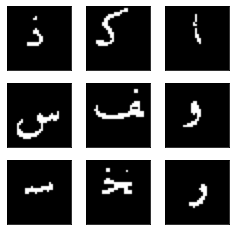

1/1 [==============================] - 0s 139ms/step
[ 8 22  0 11 19 26  2  6 26]
['ذ' 'ل' 'ا' 'س' 'ف' 'و' 'ت' 'خ' 'و']


In [ ]:
from PIL.ImageFont import load
import cv2 as cv 
from keras.models import load_model

model = load_model('/content/content/CNN_2.h5')
lb = joblib.load("/content/label_encoder.joblib")


plt.figure(figsize = (4,4))
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i].reshape(32,32).T, "gray")
plt.show()

prediction = model.predict(images)
predicted_index = np.argmax(prediction, axis=1)
print(predicted_index )
print(lb.inverse_transform(predicted_index))


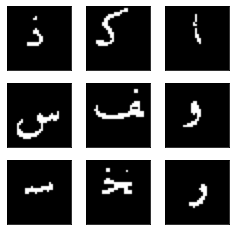

1/1 [==============================] - 0s 149ms/step
[ 8 26  0 11 19 26 11  6 26]
['ذ' 'و' 'ا' 'س' 'ف' 'و' 'س' 'خ' 'و']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from PIL.ImageFont import load
import cv2 as cv 
from keras.models import load_model

model = load_model('/content/content/CNN_3.h5')
lb = joblib.load("/content/label_encoder.joblib")


plt.figure(figsize = (4,4))
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i].reshape(32,32).T, "gray")
plt.show()

prediction = model.predict(images)
predicted_index = np.argmax(prediction, axis=1)
print(predicted_index )
print(lb.inverse_transform(predicted_index))
from google.colab import files
files.download('/content/label_encoder.joblib')